# **TabNet model for Car Price Prediction**



### **Giới thiệu về mô hình TabNet**

**TabNet (Attentive Interpretable Tabular Learning)** là một kiến trúc mạng nơ-ron sâu (Deep Learning) được Google Research phát triển đặc biệt cho dữ liệu dạng bảng. Nó được thiết kế để kết hợp những ưu điểm của hai thế giới: khả năng diễn giải của các mô hình cây (như Random Forest, Gradient Boosting) và sức mạnh biểu diễn của các mô hình học sâu.

**Các đặc điểm nổi bật:**

1.  **Cơ chế chú ý tuần tự (Sequential Attention):** Thay vì xem xét tất cả các đặc trưng cùng một lúc, TabNet xử lý dữ liệu qua nhiều "bước quyết định" (decision steps). Tại mỗi bước, nó sử dụng một cơ chế chú ý (attentive transformer) để chọn ra những đặc trưng quan trọng nhất cho quyết định tại thời điểm đó. Điều này mô phỏng cách các mô hình cây quyết định chọn đặc trưng nào để chia tại mỗi nút.

2.  **Lựa chọn đặc trưng theo từng mẫu (Instance-wise Feature Selection):** Nhờ cơ chế chú ý, TabNet có thể tập trung vào các đặc trưng khác nhau cho mỗi mẫu dữ liệu riêng lẻ. Ví dụ, để dự đoán giá của một chiếc xe thể thao, mô hình có thể chú ý nhiều hơn đến `Engine volume`, trong khi với một chiếc xe gia đình cũ, nó có thể tập trung vào `Mileage` và `Car_Age`.

3.  **Khả năng diễn giải (Interpretability):** Cơ chế chú ý không chỉ giúp mô hình học tốt hơn mà còn cho phép chúng ta "nhìn" vào bên trong để biết đặc trưng nào đã được sử dụng cho một dự đoán cụ thể. Điều này mang lại cả khả năng diễn giải cục bộ (cho một dự đoán) và toàn cục (tầm quan trọng của đặc trưng trên toàn bộ tập dữ liệu), một lợi thế lớn so với các mô hình học sâu "hộp đen" khác.

4.  **Hiệu năng cao:** TabNet không cần nhiều bước tiền xử lý và trích xuất đặc trưng phức tạp. Nó có khả năng tự học các mối quan hệ phi tuyến và tương tác giữa các đặc trưng từ dữ liệu thô, và thường đạt hiệu suất cạnh tranh hoặc vượt trội so với các mô hình máy học truyền thống trên nhiều bộ dữ liệu dạng bảng.

Trong bài toán này, việc sử dụng TabNet cho phép chúng ta tận dụng một mô hình hiện đại, có khả năng tự động học các mối quan hệ phức tạp trong dữ liệu giá xe mà không cần quá nhiều can thiệp thủ công, đồng thời vẫn giữ được khả năng diễn giải kết quả.

### **Cấu trúc chi tiết của TabNet**

Kiến trúc của TabNet được xây dựng từ các khối thành phần thông minh, cho phép nó xử lý dữ liệu dạng bảng một cách hiệu quả.


*Sơ đồ kiến trúc tổng quan của TabNet*

1.  **Encoder (Bộ mã hóa):** Đây là phần chính thực hiện việc dự đoán.
    *   **Xử lý tuần tự (Sequential Processing):** Thay vì xử lý tất cả các đặc trưng cùng lúc, TabNet hoạt động qua nhiều "bước quyết định" (Decision Steps), ví dụ: Step 1, Step 2,...
    *   **Attentive Transformer:** Tại mỗi bước, một khối `Attentive Transformer` sẽ quyết định **nên tập trung vào những đặc trưng nào**. Nó tạo ra một "mặt nạ" (mask) sử dụng hàm `Sparsemax` để chọn ra một tập hợp nhỏ và thưa thớt các đặc trưng quan trọng nhất cho bước đó. Cơ chế này đảm bảo rằng mô hình không sử dụng lại các đặc trưng đã được dùng ở các bước trước, buộc nó phải khám phá các khía cạnh khác của dữ liệu.
    *   **Feature Transformer:** Các đặc trưng được chọn bởi mặt nạ sau đó được đưa vào khối `Feature Transformer`. Khối này có nhiệm vụ xử lý và biến đổi các đặc trưng đó để trích xuất thông tin hữu ích. Một điểm đặc biệt là khối này bao gồm các lớp được **chia sẻ (shared)** qua tất cả các bước và các lớp **riêng biệt (step-dependent)** cho từng bước. Điều này giúp mô hình vừa học được các quy luật chung, vừa có thể tinh chỉnh cho từng bước quyết định cụ thể.
    *   **Tổng hợp kết quả:** Đầu ra từ mỗi bước quyết định được tổng hợp lại để đưa ra dự đoán cuối cùng.

2.  **Decoder (Bộ giải mã):**
    *   TabNet cũng bao gồm một bộ giải mã, được sử dụng trong giai đoạn **tự giám sát (self-supervised learning)**. Tại mỗi bước, bộ giải mã cố gắng tái tạo lại các đặc trưng đầu vào từ thông tin đã được xử lý.
    *   Mục đích của quá trình này là giúp mô hình học được các biểu diễn đặc trưng (feature representations) mạnh mẽ và có ý nghĩa ngay cả khi không có nhãn, giúp cải thiện hiệu suất khi huấn luyện với dữ liệu có giám sát sau đó.

**Tóm lại,** TabNet mô phỏng quá trình ra quyết định của con người bằng cách tập trung vào một vài thuộc tính quan trọng tại mỗi thời điểm, xử lý chúng, sau đó kết hợp tất cả các phân tích nhỏ lẻ để đưa ra kết luận cuối cùng.### **Cấu trúc chi tiết của TabNet**

Kiến trúc của TabNet được xây dựng từ các khối thành phần thông minh, cho phép nó xử lý dữ liệu dạng bảng một cách hiệu quả.


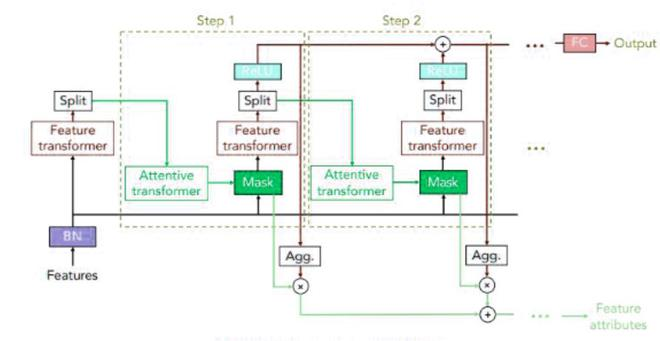

1.  **Encoder (Bộ mã hóa):** Đây là phần chính thực hiện việc dự đoán.
    *   **Xử lý tuần tự (Sequential Processing):** Thay vì xử lý tất cả các đặc trưng cùng lúc, TabNet hoạt động qua nhiều "bước quyết định" (Decision Steps), ví dụ: Step 1, Step 2,...
    *   **Attentive Transformer:** Tại mỗi bước, một khối `Attentive Transformer` sẽ quyết định **nên tập trung vào những đặc trưng nào**. Nó tạo ra một "mặt nạ" (mask) sử dụng hàm `Sparsemax` để chọn ra một tập hợp nhỏ và thưa thớt các đặc trưng quan trọng nhất cho bước đó. Cơ chế này đảm bảo rằng mô hình không sử dụng lại các đặc trưng đã được dùng ở các bước trước, buộc nó phải khám phá các khía cạnh khác của dữ liệu.

    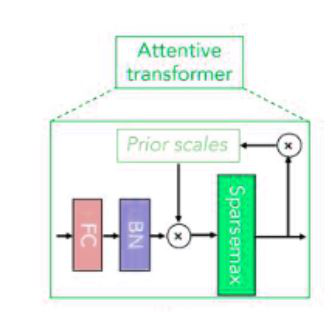

    
    *   **Feature Transformer:** Các đặc trưng được chọn bởi mặt nạ sau đó được đưa vào khối `Feature Transformer`. Khối này có nhiệm vụ xử lý và biến đổi các đặc trưng đó để trích xuất thông tin hữu ích. Một điểm đặc biệt là khối này bao gồm các lớp được **chia sẻ (shared)** qua tất cả các bước và các lớp **riêng biệt (step-dependent)** cho từng bước. Điều này giúp mô hình vừa học được các quy luật chung, vừa có thể tinh chỉnh cho từng bước quyết định cụ thể.

    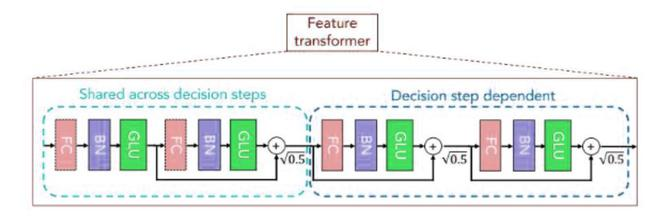
    *   **Tổng hợp kết quả:** Đầu ra từ mỗi bước quyết định được tổng hợp lại để đưa ra dự đoán cuối cùng.

2.  **Decoder (Bộ giải mã):**
    *   TabNet cũng bao gồm một bộ giải mã, được sử dụng trong giai đoạn **tự giám sát (self-supervised learning)**. Tại mỗi bước, bộ giải mã cố gắng tái tạo lại các đặc trưng đầu vào từ thông tin đã được xử lý.
    *   Mục đích của quá trình này là giúp mô hình học được các biểu diễn đặc trưng (feature representations) mạnh mẽ và có ý nghĩa ngay cả khi không có nhãn, giúp cải thiện hiệu suất khi huấn luyện với dữ liệu có giám sát sau đó.
    
    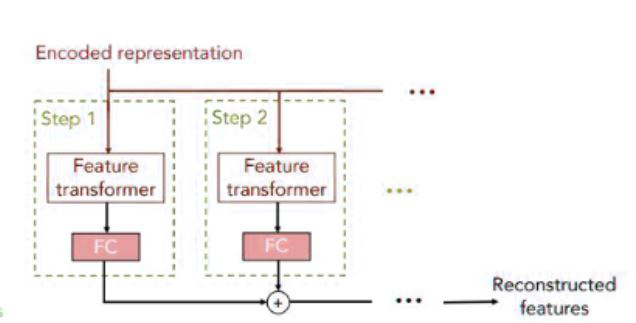

**Tóm lại,** TabNet mô phỏng quá trình ra quyết định của con người bằng cách tập trung vào một vài thuộc tính quan trọng tại mỗi thời điểm, xử lý chúng, sau đó kết hợp tất cả các phân tích nhỏ lẻ để đưa ra kết luận cuối cùng.

## **1. Thiết lập môi trường và Tải dữ liệu**



### **1.1 Import thư viện và cấu hình Kaggle API từ Secrets**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import pandas as pd
from google.colab import userdata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown
!pip install pytorch-tabnet torch --quiet
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
sns.set_style("whitegrid")
print("Các thư viện đã được import và cấu hình.")

# Tự động cấu hình Kaggle API
os.environ['KAGGLE_USERNAME'] = 'nguyenk512'
os.environ['KAGGLE_KEY'] = '187454a718c857637f7319f39e33b509'
# --- KIỂM TRA GPU ---
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Thiết bị đang được sử dụng: '{device}'")
if device == 'cuda':
    print(f"Tên GPU: {torch.cuda.get_device_name(0)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.7 MB/s eta 0:00:00
Các thư viện đã được import và cấu hình.
Thiết bị đang được sử dụng: 'cuda'
Tên GPU: Tesla T4


### **1.2 Tải, giải nén và đọc dữ liệu**

In [5]:
!pip install kaggle --quiet
!kaggle datasets download -d deepcontractor/car-price-prediction-challenge -p ./data

# Thêm cờ -o để tự động ghi đè file cũ, tránh bị hỏi và gây lỗi
!unzip -o -q ./data/car-price-prediction-challenge.zip -d ./data

# Đọc file 'car_price_prediction.csv' (đây là file dữ liệu huấn luyện)
try:
    df = pd.read_csv('./data/car_price_prediction.csv')
    print("\nĐọc dataset thành công!")
except FileNotFoundError:
    print("\nLỗi: Không tìm thấy dataset. Vui lòng kiểm tra lại kết quả lệnh 'ls' ở trên.")

Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge
License(s): CC0-1.0
  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 330MB/s]

Đọc dataset thành công!


## **2. Dọn dẹp dữ liệu và chuẩn bị dữ liệu cho mô hình**

#### **2.1 Dọn dẹp dữ liệu (Data Cleaning)**

#### Kiểm tra trùng lặp dữ liệu

In [6]:
print("Dữ liệu bị trùng lặp: ", df.duplicated().sum())
print("Tỉ lệ dữ liệu bị trùng lặp: ", df.duplicated().sum() * 100 / len(df), "%")
df.drop_duplicates(inplace=True)
print("\nDữ liệu sau khi loại bỏ trùng lặp: ")
df.shape

Dữ liệu bị trùng lặp:  313
Tỉ lệ dữ liệu bị trùng lặp:  1.6270728284035971 %

Dữ liệu sau khi loại bỏ trùng lặp: 


(18924, 18)



Làm sạch các cột để chúng có đúng định dạng số và tìm các giá trị thiếu.

In [7]:
# --- Xử lý cột 'Levy' ---
# 1. Chuyển đổi giá trị '-' thành giá trị thiếu chuẩn (NaN)
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')


# --- Xử lý cột 'Mileage' ---
# Tách số ra khỏi chuỗi "km" và chuyển thành dạng số
df['Mileage'] = df['Mileage'].str.split(' ').str[0]
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
print("Cột 'Mileage': Đã chuyển sang dạng số.")


# --- XỬ LÝ CỘT 'Engine volume' ---
# 1. Tạo cột boolean 'Engine_Turbo'
# Kiểm tra xem chuỗi có chứa 'Turbo' hay không
df['Engine_Turbo'] = df['Engine volume'].str.contains('Turbo', case=False, na=False)

# Chuyển cột boolean thành số nguyên (1 cho True, 0 cho False)
df['Engine_Turbo'] = df['Engine_Turbo'].astype(int)
print("Đã tạo cột 'Engine_Turbo' dạng số (0/1).")

# 2. Tách phần số ra khỏi chuỗi và chuyển thành dạng số cho cột 'Engine volume'
df['Engine volume'] = df['Engine volume'].str.split(' ').str[0]
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
print("Cột 'Engine volume': Đã chuyển sang dạng số.")

# --- XỬ LÝ CỘT 'Door' ---
if 'Doors' in df.columns:
    # 1. Tạo một bản đồ (mapping) để chuyển đổi các giá trị chuỗi sang số
    door_mapping = {
        '02-Mar': 2,
        '04-May': 4,
        '>=5': 5
    }

    # 2. Áp dụng bản đồ để cập nhật lại cột 'Doors'
    df['Doors'] = df['Doors'].map(door_mapping)
    # 3. Điền các giá trị NaN (nếu có) bằng giá trị mode (phổ biến nhất, là 4)
    # Điều này đảm bảo cột không còn giá trị float NaN
    if df['Doors'].isnull().any():
        doors_mode = df['Doors'].mode()[0]
        df['Doors'] = df['Doors'].fillna(doors_mode)

    # 4. Chuyển đổi kiểu dữ liệu của toàn bộ cột sang integer
    df['Doors'] = df['Doors'].astype(int)

print("Cột 'Doors': Đã chuyển sang dạng số.")
print("\n--- Dọn dẹp dữ liệu hoàn tất! ---")
# Kiểm tra lại các giá trị thiếu sau khi xử lý
df.info()

Cột 'Mileage': Đã chuyển sang dạng số.
Đã tạo cột 'Engine_Turbo' dạng số (0/1).
Cột 'Engine volume': Đã chuyển sang dạng số.
Cột 'Doors': Đã chuyển sang dạng số.

--- Dọn dẹp dữ liệu hoàn tất! ---
<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  ob

### **2.2 Chuẩn bị dữ liệu cho mô hình (Data Preparation for Modeling)**

#### **2.2.1 Chia tập dữ liệu**

In [8]:
# Tạo một bản sao để tránh SettingWithCopyWarning
df_prepared = df.copy()
X = df_prepared.drop(['ID', 'Price'], axis=1)
y = df_prepared['Price']

# Chia tập train/test 8:2
# Chia dữ liệu TRƯỚC KHI xử lý để tránh rò rỉ dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đã chia dữ liệu thành tập train và test ---")
print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
y_train_log = np.log1p(y_train) # Xử lý giá trị y-train
y_test_log = np.log1p(y_test) #Xử lý giá trị y-test

--- Đã chia dữ liệu thành tập train và test ---
Kích thước X_train: (15139, 17)
Kích thước X_test: (3785, 17)


## **3 Tiền xử lý dữ liệu**


#### **3.1 Tổng quan về tập train data**:
Phần này giúp ta đánh giá tổng quan được tập test. Qua kết quả phía dưới ta thấy được một sô đặc trưng như `Model` đã bị khuyết mất một số giá trị (1590 giá trị -> 1392 giá trị).

In [9]:
# --- Xác định các cột để đưa vào pipeline ---
# Các cột phân loại
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Các cột số
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

print(f"Các cột phân loại ({len(categorical_features)}): {categorical_features}")
print(f"Các cột số ({len(numerical_features)}): {numerical_features}")

Các cột phân loại (9): ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
Các cột số (8): ['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags', 'Engine_Turbo']


In [10]:
def inspect_categorical_features(df, cat_features):
    """
    In ra các giá trị duy nhất, số lượng, và kiểu dữ liệu trong các cột phân loại.
    Hàm này đặc biệt hữu ích để phát hiện các giá trị NaN và kiểu dữ liệu hỗn hợp.
    """
    print("--- Phân tích các cột phân loại ---")
    for col in cat_features:
        # Lấy các giá trị duy nhất
        unique_values = df[col].unique()
        num_unique = len(unique_values)

        # Kiểm tra sự tồn tại của NaN một cách tường minh
        has_nan = df[col].isnull().any()

        # Lấy tất cả các kiểu dữ liệu có trong các giá trị duy nhất
        types_in_col = {type(v) for v in unique_values}

        print(f"\n>>> Cột: '{col}'")
        print(f"    - Số lượng giá trị duy nhất: {num_unique}")
        print(f"    - Có chứa giá trị NaN không?: {'Có' if has_nan else 'Không'}")
        print(f"    - Các kiểu dữ liệu tìm thấy: {types_in_col}")

        # In ra một vài giá trị mẫu để kiểm tra
        if num_unique > 15:
            print(f"    - 15 giá trị mẫu: {unique_values[:15]}")
        else:
            print(f"    - Các giá trị: {unique_values}")

# Gọi hàm để kiểm tra các giá trị trong tập X_train
inspect_categorical_features(X_train, categorical_features)

--- Phân tích các cột phân loại ---

>>> Cột: 'Manufacturer'
    - Số lượng giá trị duy nhất: 64
    - Có chứa giá trị NaN không?: Không
    - Các kiểu dữ liệu tìm thấy: {<class 'str'>}
    - 15 giá trị mẫu: ['HYUNDAI' 'LEXUS' 'MERCEDES-BENZ' 'SUBARU' 'CHEVROLET' 'HONDA' 'SUZUKI'
 'NISSAN' 'TOYOTA' 'JEEP' 'BMW' 'RENAULT' 'OPEL' 'DODGE' 'PORSCHE']

>>> Cột: 'Model'
    - Số lượng giá trị duy nhất: 1392
    - Có chứa giá trị NaN không?: Không
    - Các kiểu dữ liệu tìm thấy: {<class 'str'>}
    - 15 giá trị mẫu: ['Santa FE' 'GX 460' 'ML 550 4.7' 'Forester' 'Cruze' 'FIT' 'Grand Vitara'
 'Juke' 'GX 470' 'Prius' 'E 350' 'Odyssey' 'Compass' 'Maxima' 'Elantra']

>>> Cột: 'Category'
    - Số lượng giá trị duy nhất: 11
    - Có chứa giá trị NaN không?: Không
    - Các kiểu dữ liệu tìm thấy: {<class 'str'>}
    - Các giá trị: ['Jeep' 'Sedan' 'Hatchback' 'Minivan' 'Goods wagon' 'Microbus' 'Coupe'
 'Universal' 'Pickup' 'Limousine' 'Cabriolet']

>>> Cột: 'Leather interior'
    - Số lượng giá trị du


#### **3.2 Xây dựng Pipeline tiền xử lí**

**Mục đích:**
Mục đích của phần này là xây dựng một quy trình tiền xử lý cho các dữ liệu cho tập train lẫn tập test. Pipeline sẽ xử lý riêng biệt hai loại dữ liệu chính: số và phân loại.

**Cách xử lý:**

*   **Đối với dữ liệu số (Numerical Data):**
    1.  **Điền giá trị thiếu (`SimpleImputer`):** Các giá trị thiếu được điền bằng `median` (trung vị) của mỗi cột. Lựa chọn này giúp giảm thiểu ảnh hưởng của các giá trị ngoại lai.
    2.  **Chuẩn hóa (`StandardScaler`):** Dữ liệu sau đó được chuẩn hóa để có trung bình bằng 0 và độ lệch chuẩn bằng 1.

*   **Đối với dữ liệu phân loại (Categorical Data):**
    1.  **Xử lý giá trị lạ:** Một bước xử lý thủ công được thực hiện để tìm các hạng mục chỉ xuất hiện trong tập test và gán chúng thành một nhãn chung là `__UNKNOWN__`.
    2.  **Mã hóa thứ tự (`OrdinalEncoder`):** Các giá trị văn bản (bao gồm cả `__UNKNOWN__`) được chuyển đổi thành các số nguyên duy nhất. TabNet sử dụng các số nguyên này làm chỉ số để tra cứu trong các lớp nhúng (embedding layers), cho phép mô hình học được biểu diễn vector cho từng hạng mục.

`ColumnTransformer` sẽ kết hợp hai quy trình xử lý trên và áp dụng chúng một cách chính xác lên các cột tương ứng của dữ liệu.


In [11]:
print(f"Các cột số ({len(numerical_features)}): {numerical_features}")

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Pipeline cho các biến số
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Điền giá trị thiếu bằng median
    ('scaler', StandardScaler())                  # Chuẩn hóa

  ])

# Pipeline cho các biến phân loại
# 1) Đồng nhất kiểu dữ liệu cat và map giá trị lạ ở X_test -> "__UNKNOWN__"
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()
for col in categorical_features:
    X_train_cat[col] = X_train_cat[col].astype(str)
    X_test_cat[col] = X_test_cat[col].astype(str)

final_categories = []
for col in categorical_features:
    train_cats = pd.Index(X_train_cat[col].unique()).tolist()
    mask_unknown = ~X_test_cat[col].isin(train_cats)
    if mask_unknown.any():
        X_test_cat.loc[mask_unknown, col] = "__UNKNOWN__"
        train_cats = train_cats + ["__UNKNOWN__"]
    final_categories.append(train_cats)

# 3) Pipeline phân loại: KHÔNG dùng handle_unknown/unknown_value
categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=final_categories, dtype=np.int64))
])
# Kết hợp hai pipeline trên bằng ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Giữ lại các cột không được xử lý (nếu có)
)
# 1. Fit và transform trên tập train (đÃ xử lý cat)
X_train_processed = preprocessor.fit_transform(X_train_cat)

# 2. Chỉ transform trên tập test (đÃ xử lý cat)
X_test_processed = preprocessor.transform(X_test_cat)

print("\n--- Tiền xử lý bằng Pipeline hoàn tất ---")
print(f"Kích thước X_train sau xử lý: {X_train_processed.shape}")
print(f"Kích thước X_test sau xử lý: {X_test_processed.shape}")
print(f"Kiểu dữ liệu sau khi xử lý: {type(X_train_processed)}")


Các cột số (8): ['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags', 'Engine_Turbo']

--- Tiền xử lý bằng Pipeline hoàn tất ---
Kích thước X_train sau xử lý: (15139, 17)
Kích thước X_test sau xử lý: (3785, 17)
Kiểu dữ liệu sau khi xử lý: <class 'numpy.ndarray'>


## **4 Huấn luyện mô hình**


In [12]:
# --- Lấy thông tin về các cột phân loại từ preprocessor đã fit ---

# 1. Lấy chỉ số của các cột phân loại
# ColumnTransformer sẽ đặt các cột số lên đầu, sau đó đến các cột phân loại.
num_features_len = len(numerical_features)
cat_features_len = len(categorical_features)
cat_idxs = list(range(num_features_len, num_features_len + cat_features_len))

# 2. Lấy số lượng giá trị duy nhất (cardinality) của mỗi cột phân loại
# thông qua bước 'ordinal' trong pipeline 'cat'
ordinal_encoder = preprocessor.named_transformers_['cat'].named_steps['ordinal']
cat_dims = [len(cats) for cats in ordinal_encoder.categories_]

print(f"Vị trí các cột phân loại (cat_idxs): {cat_idxs}")
print(f"Số lượng giá trị duy nhất (cat_dims): {cat_dims}")


# 1. Định nghĩa các siêu tham số cho mô hình
tabnet_params = dict(
    cat_dims=cat_dims,
    cat_idxs=cat_idxs,
    cat_emb_dim = [min(64, max(1, n_cat // 2)) for n_cat in cat_dims],
    n_d=32,
    n_a=32,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-5,
    optimizer_fn=torch.optim.AdamW,
    optimizer_params=dict(lr=5e-3, weight_decay=1e-5),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax',
    verbose=10
)

# 2. Khởi tạo mô hình
regressor = TabNetRegressor(**tabnet_params)

# 3. Reshape biến mục tiêu y
y_train_reshaped = y_train_log.values.reshape(-1, 1)
y_test_reshaped = y_test_log.values.reshape(-1, 1)

# 4. Huấn luyện mô hình
print("\n--- Bắt đầu huấn luyện TabNet ---")
regressor.fit(
    X_train=X_train_processed, y_train=y_train_reshaped,
    eval_set=[(X_train_processed, y_train_reshaped), (X_test_processed, y_test_reshaped)],
    eval_name=['train', 'valid'],
    eval_metric=['rmse', 'mae'],
    max_epochs=800,
    patience=100, # Tăng patience một chút
    batch_size=1024,
    virtual_batch_size=256,
    drop_last=False
)
print("--- Huấn luyện hoàn tất! ---")


Vị trí các cột phân loại (cat_idxs): [8, 9, 10, 11, 12, 13, 14, 15, 16]
Số lượng giá trị duy nhất (cat_dims): [65, 1393, 11, 2, 7, 4, 3, 2, 16]

--- Bắt đầu huấn luyện TabNet ---


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 60.37594| train_rmse: 6.60936 | train_mae: 6.34498 | valid_rmse: 6.63022 | valid_mae: 6.35451 |  0:00:04s
epoch 10 | loss: 1.96121 | train_rmse: 1.5136  | train_mae: 1.22811 | valid_rmse: 1.57659 | valid_mae: 1.24455 |  0:00:19s
epoch 20 | loss: 1.67277 | train_rmse: 1.28313 | train_mae: 0.84838 | valid_rmse: 1.31008 | valid_mae: 0.86282 |  0:00:33s
epoch 30 | loss: 1.49997 | train_rmse: 1.22072 | train_mae: 0.79609 | valid_rmse: 1.31124 | valid_mae: 0.83146 |  0:00:45s
epoch 40 | loss: 1.43755 | train_rmse: 1.18797 | train_mae: 0.78286 | valid_rmse: 1.23768 | valid_mae: 0.80966 |  0:00:57s
epoch 50 | loss: 1.39105 | train_rmse: 1.1643  | train_mae: 0.75898 | valid_rmse: 1.23478 | valid_mae: 0.80375 |  0:01:09s
epoch 60 | loss: 1.32107 | train_rmse: 1.12547 | train_mae: 0.72053 | valid_rmse: 1.21162 | valid_mae: 0.7734  |  0:01:21s
epoch 70 | loss: 1.27095 | train_rmse: 1.12833 | train_mae: 0.71296 | valid_rmse: 1.21982 | valid_mae: 0.76572 |  0:01:33s
epoch 80 | loss:

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


--- Huấn luyện hoàn tất! ---


## **5 Đánh giá mô hình**

### **5.1 Hàm đánh giá mô hình**

In [15]:
# Hàm print metrics dùng để xuất kết quả sau khi đã huấn luyện model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def print_metrics(y_true, y_pred, label='Model'):
        y_true_real = np.expm1(y_true)
        y_pred_real = np.expm1(y_pred)
        mae  = mean_absolute_error(y_true_real, y_pred_real)
        rmse = np.sqrt(mean_squared_error(y_true_real, y_pred_real))
        r2_log  = r2_score(y_true, y_pred)
        r2_real = r2_score(y_true_real, y_pred_real)
        print(f"{label}: MAE={mae:,.2f}, RMSE={rmse:,.2f}, R2(log)={r2_log:.4f}, R2(real)={r2_real:.4f}")

### **5.2 Dự đoán và đánh giá mô hình trên tập test**



In [16]:
# ---- Dự đoán & đánh giá trên TEST ----
y_pred_log = regressor.predict(X_test_processed)

print(f"--- Kết quả TabnNet Model ---")
print_metrics(y_test_log, y_pred_log, label="TabNet model")

--- Kết quả TabnNet Model ---
TabNet model: MAE=6,546.27, RMSE=13,294.60, R2(log)=0.5133, R2(real)=0.4895


### **5.3 Biểu đồ đánh giá mô hình**

TabNet model | R2 train (log): 0.670 | R2 test (log): 0.513 


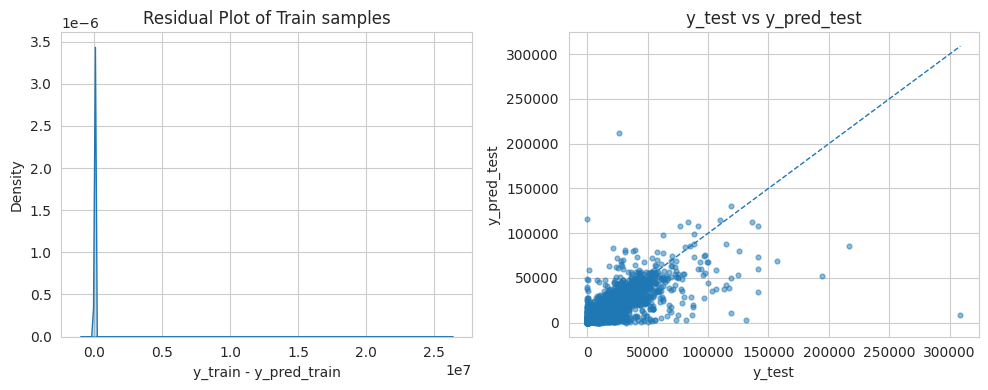

In [25]:
from sklearn.model_selection import KFold, cross_val_score
# --- 1. Dự đoán trên tập Test và Train ---
y_pred_tr_log = regressor.predict(X_train_processed)
y_pred_te_log = regressor.predict(X_test_processed)
# Điểm số R² trên log-space
r2_tr = r2_score(y_train_log, y_pred_tr_log)
r2_te = r2_score(y_test_log, y_pred_te_log)
print(f"TabNet model | R2 train (log): {r2_tr:.3f} | R2 test (log): {r2_te:.3f} ")
# Quy về đơn vị gốc để trực quan
ytr_real  = np.expm1(y_train_log);  yptr_real = np.expm1(y_pred_tr_log)
yte_real  = np.expm1(y_test_log);  ypte_real = np.expm1(y_pred_te_log)
# Plot giống concept hàm bạn (residual train + scatter test)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].set_title('Residual Plot of Train samples')
residuals_train = ytr_real.to_numpy() - yptr_real.ravel()
sns.kdeplot(residuals_train, fill=True, ax=ax[0])
ax[0].set_xlabel('y_train - y_pred_train')
ax[1].set_title('y_test vs y_pred_test')
ax[1].scatter(yte_real.to_numpy(), ypte_real.ravel(), s=12, alpha=0.5)
m = float(min(yte_real.min(), ypte_real.min()))
M = float(max(yte_real.max(), ypte_real.max()))
ax[1].plot([m, M], [m, M], ls="--", lw=1)
ax[1].set_xlabel('y_test'); ax[1].set_ylabel('y_pred_test')

plt.tight_layout()
plt.show()


### **5.4 Nhận xét mô hình**


### 1) Kết quả tổng hợp (Test set)

| Mô hình         | MAE   | RMSE   | R² (test_real) | R² (test_log) | R² (train_log) |
|---|---:|---:|---:|---:|---:|
| **TabNet model** | 6,546 | 13,294 | 0.490 | 0.513 | 0.670 |

---

### 2) Diễn giải biểu đồ chẩn đoán

- **Residual distribution (Train)**: đỉnh quanh 0 rất cao cho thấy mô hình dự đoán khá tốt trên tập train. nhưng **đuôi phải rất dài** ⇒ mô hình có xu hướng **dự đoán thấp** với xe giá cao (residual = true − pred > 0) và cho thấy mô hình chưa nhận diện được các đặc điểm của các xe có giá rất lớn.
- **Parity plot (Test)**: Ở phân khúc xe có giá rất thấp mô hình có xu hướng dự đoán giá cao hơn so với thực tế. Nhìn chung mô hình thường dự đoán giá thấp hơn so với thực tế trên toàn bộ mô hình và khi giá thực tế càng cao thì sai lệch này càng lớn.

---